# Creating Customer Segments

In this project you, will analyze a dataset containing annual spending amounts for internal structure, to understand the variation in the different types of customers that a wholesale distributor interacts with.

Instructions:

- Run each code block below by pressing **Shift+Enter**, making sure to implement any steps marked with a TODO.
- Answer each question in the space provided by editing the blocks labeled "Answer:".
- When you are done, submit the completed notebook (.ipynb) with all code blocks executed, as well as a .pdf version (File > Download as).

In [4]:
# Import libraries: NumPy, pandas, matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Tell iPython to include plots inline in the notebook
%matplotlib inline

# Read dataset
data = pd.read_csv("wholesale-customers.csv")
print "Dataset has {} rows, {} columns".format(*data.shape)
print data.head()  # print the first 5 rows

Dataset has 440 rows, 6 columns
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185


##Feature Transformation

**1)** In this section you will be using PCA and ICA to start to understand the structure of the data. Before doing any computations, what do you think will show up in your computations? List one or two ideas for what might show up as the first PCA dimensions, or what type of vectors will show up as ICA dimensions.

Answer: The PCA algorithm looks for correlation among features captures the priciple axes of variation. This means it finds large general trends in the data. For this dataset, PCA could find so-called "eigenstores" or fundamental types of stores that the actual stores are linear combinations of.

ICA focuses more on specific features that are idependent of one another. This makes me believe that its components will correspond to individual product categories, or groups of them that are correlated with each other.

###PCA

In [5]:
# TODO: Apply PCA with the same number of dimensions as variables in the dataset
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(data)

# Print the components and the amount of variance in the data contained in each dimension
print pca.components_
#print pca.explained_variance_ratio_

[[-0.97653685 -0.12118407 -0.06154039 -0.15236462  0.00705417 -0.06810471]
 [-0.11061386  0.51580216  0.76460638 -0.01872345  0.36535076  0.05707921]
 [-0.17855726  0.50988675 -0.27578088  0.71420037 -0.20440987  0.28321747]
 [-0.04187648 -0.64564047  0.37546049  0.64629232  0.14938013 -0.02039579]
 [ 0.015986    0.20323566 -0.1602915   0.22018612  0.20793016 -0.91707659]
 [-0.01576316  0.03349187  0.41093894 -0.01328898 -0.87128428 -0.26541687]]


In [6]:
pca.explained_variance_ratio_

array([ 0.45961362,  0.40517227,  0.07003008,  0.04402344,  0.01502212,
        0.00613848])

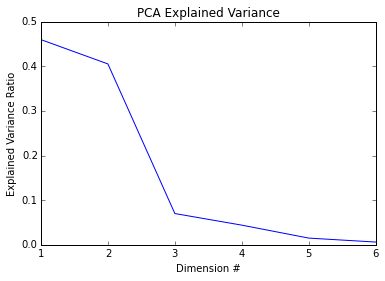

In [7]:
# plot variance explained by each dimension
X = np.linspace(1,6,6)
y = pca.explained_variance_ratio_
plt.plot(X,y)
plt.ylabel("Explained Variance Ratio")
plt.xlabel("Dimension #")
plt.title("PCA Explained Variance")

**2)** How quickly does the variance drop off by dimension? If you were to use PCA on this dataset, how many dimensions would you choose for your analysis? Why?

Answer: The variance drops off steeply after the second dimension. I would choose 2 dimensions when using PCA on this dataset, using a cutoff of 10% of the variance explained. I could also see an argument made for using the first three dimensions, using a cutoff of 5%.

**3)** What do the dimensions seem to represent? How can you use this information?

Answer: The first dimension seems to represent simply annual spending on fresh products, with a large weight of -0.97 on that feature. It also seems to distinguish between edible and non-edible categories, placing a negative weight on all edible ones, and a positive weight on the sole inedbile category, Detergents_paper.

The second dimensions has the largest weights on the Milk, Grocery, and Frozen features, at 0.52, 0.51, and -0.65 respectively. This dimension seems to be capturing, then, amount spent on these three features (the next three largest edible foods categories) not including Fresh, which was already captured in the first component. 

###ICA

In [8]:
# TODO: Fit an ICA model to the data
# Note: Adjust the data to have center at the origin first!
from sklearn.decomposition import FastICA
from sklearn.preprocessing import scale

numpy_matrix = data.as_matrix().astype(float)

scaled_data = scale(numpy_matrix)

In [9]:
df = pd.DataFrame(scaled_data)
df.head()

,0,1,2,3,4,5
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


In [10]:
scaled_data.mean(axis=0)

array([ -2.42230478e-17,  -1.58963751e-17,  -6.03052961e-17,
         1.13545537e-17,  -1.91765795e-17,  -8.27620800e-17])

In [11]:
scaled_data.std(axis=0)

array([ 1.,  1.,  1.,  1.,  1.,  1.])

In [9]:
ica = FastICA()
ica.fit(scaled_data)

# Print the independent components
print ica.components_

[[ 0.00194198  0.07257656 -0.05516439 -0.00176319  0.01580981 -0.0170613 ]
 [-0.00377719  0.01704285  0.11435136 -0.00709698 -0.13431947 -0.01614196]
 [ 0.00488239  0.00161847  0.00569759  0.0025317  -0.00242709 -0.05096443]
 [ 0.00265506 -0.01387399  0.06121121  0.0019801  -0.00408808 -0.00412691]
 [-0.05022853  0.00633848  0.00596863  0.00328321 -0.00986164  0.00293241]
 [ 0.01092951  0.00103627 -0.00734661 -0.05404965  0.00264022  0.01676653]]


**4)** For each vector in the ICA decomposition, write a sentence or two explaining what sort of object or property it corresponds to. What could these components be used for?

Answer: Since the features in this datset come from the buying behavior of stores, the components of the ICA likely capture different types of stores.

The first component of ICA weights the 2nd, 3rd, 5th and 6th features most heavily, which are the Milk, Grocery, Detergents_Paper, and Delicatessen features respectively. This could represent a convenience store with some groceries, a fridge with milk, inedible household supplies and a deli counter (common in NY). 

The second component weights the Fresh and Detergents_paper features most heavily, which could represent a normal supermarket that features a large produce section and lots of non-edible goods as well.

The third component has similar weights to the first component, though it has a noticeably larger weight of -0.13 on the Detergents_Paper feature. This likely captures buyers that maybe have some food products but mostly sell non-edible goods (like a drug store).

Skipping to the last component, it's heaviest weight of 0.051 is on the Delicatessen feature, and this is straightforward, captures buyers that are delis.

##Clustering

In this section you will choose either K Means clustering or Gaussian Mixed Models clustering, which implements expectation-maximization. Then you will sample elements from the clusters to understand their significance.

###Choose a Cluster Type

**5)** What are the advantages of using K Means clustering or Gaussian Mixture Models?

Answer: The K Means algorithm uses hard assignment, meaning every point is assigned to a cluster at every iteration. This is in contrast to a GMM which uses soft assignment, meaning points are given probabilities of belonging to a cluster. GMMs are flexible to fitting clusters to the data that vary in size and shape. On the other hand, K Means  suffers when the data clusters are not spherical in shape, and when one cluster in large in size or has greater variance than others.

Let's plot the data after reducing its dimensionality via PCA, and determine whether K Means or a GMM is more appropriaate.

**6)** Below is some starter code to help you visualize some cluster data. The visualization is based on [this demo](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) from the sklearn documentation.

In [12]:
# Import clustering modules
from sklearn.cluster import KMeans
from sklearn.mixture import GMM

In [110]:
# TODO: First we reduce the data to two dimensions using PCA to capture variation
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)
print reduced_data[:10]  # print upto 10 elements

[[-0.19329055  0.30509996]
 [-0.4344199   0.32841262]
 [-0.81114323 -0.8150957 ]
 [ 0.77864783 -0.65275373]
 [-0.16628726 -1.27143372]
 [ 0.15616993  0.29514099]
 [ 0.3352884   0.52500326]
 [-0.14058643  0.23099269]
 [ 0.51731954  0.65936283]
 [-1.59210908  0.74101133]]


In [156]:
pca.explained_variance_ratio_

array([ 0.44082893,  0.283764  ])

In [157]:
pca.components_

array([[-0.04288396, -0.54511832, -0.57925635, -0.05118859, -0.5486402 ,
        -0.24868198],
       [-0.52793212, -0.08316765,  0.14608818, -0.61127764,  0.25523316,
        -0.50420705]])

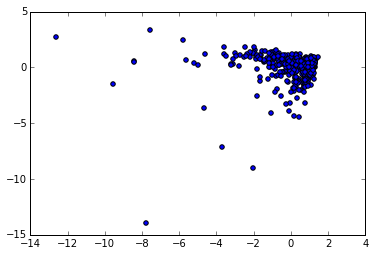

In [111]:
plt.scatter(reduced_data[:,0], reduced_data[:,1])


In [112]:
reduced_data = reduced_data[~((reduced_data[:,0]<-5) & (reduced_data[:,1]<-5))]
reduced_data = reduced_data[~((reduced_data[:,0]<-5) | (reduced_data[:,1]<-5))]

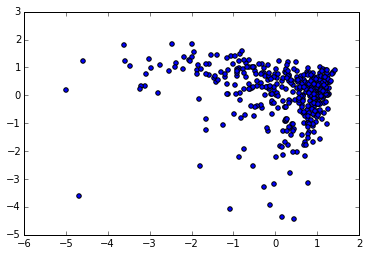

In [113]:
plt.scatter(reduced_data[:,0], reduced_data[:,1])

In [114]:
reduced_data.shape

(429, 2)

In [ ]:
# Now the reduced data looks better for clustering. I achieved this by removing outlier points
# That were either less than -5 on one or both axes.
# It is still not spherical in shape, so we'll use a GMM to fit the clusters.

In [144]:
# TODO: Implement your clustering algorithm here, and fit it to the reduced data for visualization
# The visualizer below assumes your clustering object is named 'clusters'

bics = []
for i in range(1,8):
    gmm = GMM(n_components=i)
    gmm.fit(reduced_data)
    bic = gmm.bic(reduced_data)
    bics.append(bic)

#clusters = gmm.fit(reduced_data)
#print clusters

#gmm = GMM(n_components=6)
#clusters = gmm.fit(reduced_data)
#print clusters

In [145]:
bics

[2510.6103495368279,
 2189.9811348448629,
 2087.6709809020185,
 2075.9255492840102,
 2044.6954634767667,
 2066.7358435345673,
 2077.9230437201909]

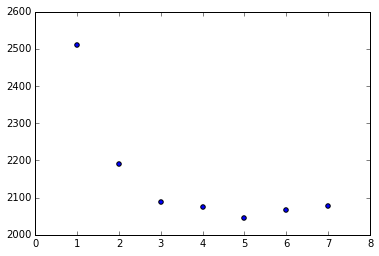

In [150]:
plt.scatter(np.linspace(1,7,7), bics)

In [151]:
# based on this graph of the BIC score of the gmm fit, I'll chose number of clusters to be three.
# This is when the graph of the BICs (Bayesian Information Criterion) flattens out and ceases to improve (get lower)

In [152]:
# fitting best gmm model with 3 number of components
gmm = GMM(n_components=3)
clusters = gmm.fit(reduced_data)
print clusters

GMM(covariance_type='diag', init_params='wmc', min_covar=0.001,
  n_components=3, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001)


In [153]:
# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])

In [154]:
# TODO: Find the centroids for KMeans or the cluster means for GMM 

centroids = gmm.means_
print centroids

[[ 0.94901992  0.08307703]
 [-0.88764135  0.79111673]
 [ 0.0113212  -0.86926139]]


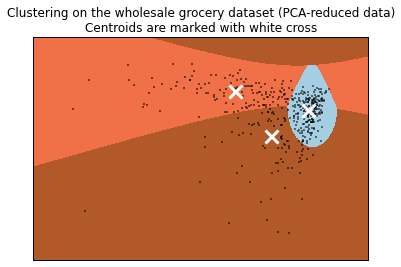

In [155]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

**7)** What are the central objects in each cluster? Describe them as customers.

Answer: If we look back to the pca components for this reduced data, we see that the first component weighs the 2nd, 3rd, and 5th features most heavily, and the second component weighs the 1st, 4th, and 6th most heavily. This means the first component corresponds primarily to a combination of the Milk, Grocery, Detergents_Paper features, and the second component corresponds primarily to a combination of the Fresh, Frozen and Delicatessan features.

With that information in mind, it will help us interpret the types of stores represented by the three clusters. The first cluster, centered at (0.85, 0.08) is comprised of stores that scored highly in the first component, and about average in the second component. This reminds me of a supermarket store that focuses on Groceries but also sells at least an average amount of everything.

The second cluster, centered at (-0.89, 0.79), captures stores that likely sell a specific item like a fresh fruit/vegetable stand or a deli.

The final cluster is capturing stores that is about average in the first component but does not deal with the second component. My intuition is these are smaller supermarket-type stores that don't sell as much of the first component as the first cluster, and are too small for deli counters, or a large produce and frozen foods section.

###Conclusions

** 8)** Which of these techniques did you feel gave you the most insight into the data?

Answer: I felt like PCA was a better fit for reducing this data. THe first four components were able to explain over 95% of the variance in the original data. I also found it useful to see which of the features were weighted heavily in the same component and learn from that the types goods the distributor's customers bought together.

**9)** How would you use that technique to help the company design new experiments?

Answer: Based on the information learned form this study, I would experiment with bundling the storing & shipping of types of goods that are frequently bought together by clustered store types. We saw that the Milk, Grocery, and Detergents_Paper features were heavily weighted inthe first component of the PCA-reduced dataset. Perhaps storing these items near each other in the warehouse can reduce delivery costs, since they are more likely to be bought together. I would investigated the effect of different goods storage systems on delivery costs and times, all else equal.

**10)** How would you use that data to help you predict future customer needs?

Answer: I would label different customers are elastic or inelastic to price based on the price varying done in the A/B testing. Then using those labels as the "truth" and statistics on the customer (like size or years as customer) as the features, I could train a neural network to determine if new customers will be elastic or inelastic to price changes.

I would attempt to predict customer orders before they occur by fitting a time-series model like an ARMA model to the data. Instead of fitting one model for all the data, I would fit one ARMA model per each cluster's sales to get better granularity in the results. This would require adding a time feature to the data, which is important because many stores likely 